<a href="https://colab.research.google.com/github/viniciusfranca019/group-project-codenation/blob/main/Clusteriza%C3%A7%C3%A3o_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código de clusterização implementado conforme modelo disponivel no link abaixo:

[Find and Visualize clusters with K-Means](https://app.datacamp.com/workspace/w/2315d3ec-481c-4599-bc71-d2f32a961cbb/edit)

# Clusterização dos dados do mercado

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Drive_projeto_Codenation/OHE_df.csv').drop(columns=['Unnamed: 0'])

df.head()

,id,sg_uf_AC,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,natureza_juridica_macro_ADMINISTRACAO PUBLICA,natureza_juridica_macro_CARGO POLITICO,natureza_juridica_macro_ENTIDADES EMPRESARIAIS,natureza_juridica_macro_ENTIDADES SEM FINS LUCRATIVOS,natureza_juridica_macro_INSTITUICOES EXTRATERRITORIAIS,natureza_juridica_macro_OUTROS,natureza_juridica_macro_PESSOAS FISICAS,fl_rm_NAO,fl_rm_SIM,nm_segmento_ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,nm_segmento_AGRICULTURA PECUARIA PRODUCAO FLORESTAL PESCA E AQUICULTURA,nm_segmento_AGUA ESGOTO ATIVIDADES DE GESTAO DE RESIDUOS E DESCONTAMINACAO,nm_segmento_ALOJAMENTO E ALIMENTACAO,nm_segmento_ARTES CULTURA ESPORTE E RECREACAO,nm_segmento_ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEMENTARES,nm_segmento_ATIVIDADES FINANCEIRAS DE SEGUROS E SERVICOS RELACIONADOS,nm_segmento_ATIVIDADES IMOBILIARIAS,nm_segmento_ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,nm_segmento_COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS,nm_segmento_CONSTRUCAO,nm_segmento_EDUCACAO,nm_segmento_ELETRICIDADE E GAS,nm_segmento_INDUSTRIAS DE TRANSFORMACAO,nm_segmento_INDUSTRIAS EXTRATIVAS,nm_segmento_INFORMACAO E COMUNICACAO,nm_segmento_ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUICOES EXTRATERRITORIAIS,nm_segmento_OUTRAS ATIVIDADES DE SERVICOS,nm_segmento_SAUDE HUMANA E SERVICOS SOCIAIS,nm_segmento_SERVICOS DOMESTICOS,nm_segmento_TRANSPORTE ARMAZENAGEM E CORREIO,fl_spa_False,fl_spa_True,fl_antt_False,...,sg_uf_matriz_MT,sg_uf_matriz_PA,sg_uf_matriz_PB,sg_uf_matriz_PE,sg_uf_matriz_PI,sg_uf_matriz_PR,sg_uf_matriz_RJ,sg_uf_matriz_RN,sg_uf_matriz_RO,sg_uf_matriz_RR,sg_uf_matriz_RS,sg_uf_matriz_SC,sg_uf_matriz_SE,sg_uf_matriz_SP,sg_uf_matriz_TO,de_saude_tributaria_AMARELO,de_saude_tributaria_AZUL,de_saude_tributaria_CINZA,de_saude_tributaria_LARANJA,de_saude_tributaria_VERDE,de_saude_tributaria_VERMELHO,de_nivel_atividade_ALTA,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_nivel_atividade_MUITO BAIXA,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,True,14.457534,False,False,False,False,False,False,True,True,0.0,0.0,3132172.8,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,True,1.463014,False,False,False,True,False,False,True,True,0.0,0.0,210000.0,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,True,7.093151,False,False,False,True,False,False,False,True,0.0,0.0,50000.0,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,True,6.512329,False,False,False,False,False,False,True,True,0.0,0.0,210000.0,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,True,3.200000,False,False,False,False,False,False,True,True,0.0,0.0,210000.0,210000.0,0


In [13]:
# g = sns.PairGrid(df)
# g.map(sns.scatterplot);
df_without_id = df.set_index('id')

In [14]:
df_without_id

,sg_uf_AC,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,natureza_juridica_macro_ADMINISTRACAO PUBLICA,natureza_juridica_macro_CARGO POLITICO,natureza_juridica_macro_ENTIDADES EMPRESARIAIS,natureza_juridica_macro_ENTIDADES SEM FINS LUCRATIVOS,natureza_juridica_macro_INSTITUICOES EXTRATERRITORIAIS,natureza_juridica_macro_OUTROS,natureza_juridica_macro_PESSOAS FISICAS,fl_rm_NAO,fl_rm_SIM,nm_segmento_ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,nm_segmento_AGRICULTURA PECUARIA PRODUCAO FLORESTAL PESCA E AQUICULTURA,nm_segmento_AGUA ESGOTO ATIVIDADES DE GESTAO DE RESIDUOS E DESCONTAMINACAO,nm_segmento_ALOJAMENTO E ALIMENTACAO,nm_segmento_ARTES CULTURA ESPORTE E RECREACAO,nm_segmento_ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEMENTARES,nm_segmento_ATIVIDADES FINANCEIRAS DE SEGUROS E SERVICOS RELACIONADOS,nm_segmento_ATIVIDADES IMOBILIARIAS,nm_segmento_ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,nm_segmento_COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS,nm_segmento_CONSTRUCAO,nm_segmento_EDUCACAO,nm_segmento_ELETRICIDADE E GAS,nm_segmento_INDUSTRIAS DE TRANSFORMACAO,nm_segmento_INDUSTRIAS EXTRATIVAS,nm_segmento_INFORMACAO E COMUNICACAO,nm_segmento_ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUICOES EXTRATERRITORIAIS,nm_segmento_OUTRAS ATIVIDADES DE SERVICOS,nm_segmento_SAUDE HUMANA E SERVICOS SOCIAIS,nm_segmento_SERVICOS DOMESTICOS,nm_segmento_TRANSPORTE ARMAZENAGEM E CORREIO,fl_spa_False,fl_spa_True,fl_antt_False,fl_antt_True,...,sg_uf_matriz_MT,sg_uf_matriz_PA,sg_uf_matriz_PB,sg_uf_matriz_PE,sg_uf_matriz_PI,sg_uf_matriz_PR,sg_uf_matriz_RJ,sg_uf_matriz_RN,sg_uf_matriz_RO,sg_uf_matriz_RR,sg_uf_matriz_RS,sg_uf_matriz_SC,sg_uf_matriz_SE,sg_uf_matriz_SP,sg_uf_matriz_TO,de_saude_tributaria_AMARELO,de_saude_tributaria_AZUL,de_saude_tributaria_CINZA,de_saude_tributaria_LARANJA,de_saude_tributaria_VERDE,de_saude_tributaria_VERMELHO,de_nivel_atividade_ALTA,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_nivel_atividade_MUITO BAIXA,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,True,14.457534,False,False,False,False,False,False,True,True,0.0,0.0,3132172.8,3132172.8,0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,True,1.463014,False,False,False,True,False,False,True,True,0.0,0.0,210000.0,210000.0,0
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,True,7.093151,False,False,False,True,False,False,False,True,0.0,0.0,50000.0,50000.0,0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,True,6.512329,False,False,False,False,False,False,True,True,0.0,0.0,210000.0,210000.0,0
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,True,3.200000,False,False,False,False,False,False,True,True,0.0,0.0,210000.0,210000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [15]:
!pip install yellowbrick

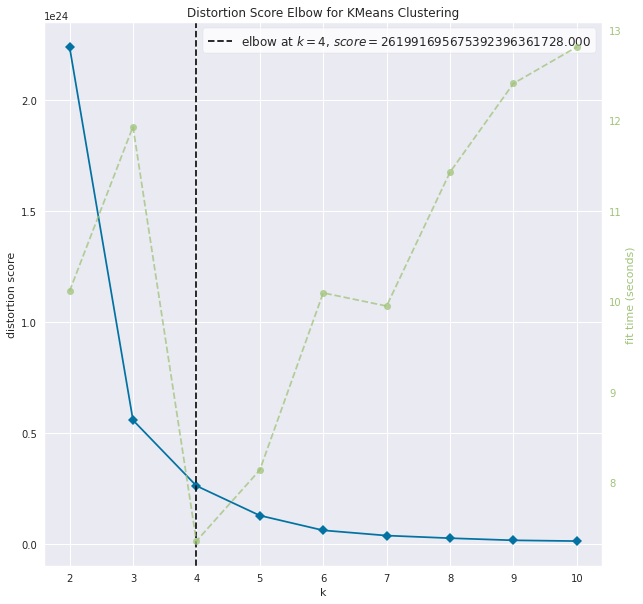

In [16]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
plt.figure(figsize=(10,10))

visualizer = KElbowVisualizer(model)
visualizer.fit(df_without_id)    


sns.set_style('whitegrid')
# Fit the data to the visualizer
visualizer.show() 

# X = df_without_id
# wcss = []
# for i in range(1, 11):
    # model = KMeans(n_clusters = i, random_state = 0)
    # model.fit(X)                              
    # wcss.append(model.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')                               # Set plot title
# plt.xlabel('Number of clusters')                        # Set x axis name
# plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
# plt.show()


In [19]:
kmeans = KMeans(n_clusters = 4)
kmeans = kmeans.fit(df_without_id)

print(kmeans)

KMeans(n_clusters=4)


In [20]:
dir(kmeans)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'feature_names_in_',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',

In [18]:
# fazer código de assingn de cluster

AQUI TEMOS OS CLUSTERS GERADOS PELO KMEANS

De forma sequencial devemos ser capazes de colocar esses labels no nosso dataframe de mercado.

In [21]:
market_cluster_labels = kmeans.labels_
market_cluster_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [29]:
print(df_without_id.shape)
print(market_cluster_labels.shape)

(432292, 94)
(432292,)


Como vemos temos valores unicos correspondentes aos 4 clusters que criamos

In [27]:
np.unique(market_cluster_labels)

array([0, 1, 2, 3], dtype=int32)

In [30]:
df_without_id['cluster_labels'] = market_cluster_labels

In [36]:
df_without_id['cluster_labels'] = df_without_id['cluster_labels'].map(lambda cluster: f"empresa do grupo {int(cluster) + 1}")

In [37]:
df_without_id

,sg_uf_AC,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,natureza_juridica_macro_ADMINISTRACAO PUBLICA,natureza_juridica_macro_CARGO POLITICO,natureza_juridica_macro_ENTIDADES EMPRESARIAIS,natureza_juridica_macro_ENTIDADES SEM FINS LUCRATIVOS,natureza_juridica_macro_INSTITUICOES EXTRATERRITORIAIS,natureza_juridica_macro_OUTROS,natureza_juridica_macro_PESSOAS FISICAS,fl_rm_NAO,fl_rm_SIM,nm_segmento_ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,nm_segmento_AGRICULTURA PECUARIA PRODUCAO FLORESTAL PESCA E AQUICULTURA,nm_segmento_AGUA ESGOTO ATIVIDADES DE GESTAO DE RESIDUOS E DESCONTAMINACAO,nm_segmento_ALOJAMENTO E ALIMENTACAO,nm_segmento_ARTES CULTURA ESPORTE E RECREACAO,nm_segmento_ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEMENTARES,nm_segmento_ATIVIDADES FINANCEIRAS DE SEGUROS E SERVICOS RELACIONADOS,nm_segmento_ATIVIDADES IMOBILIARIAS,nm_segmento_ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,nm_segmento_COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS,nm_segmento_CONSTRUCAO,nm_segmento_EDUCACAO,nm_segmento_ELETRICIDADE E GAS,nm_segmento_INDUSTRIAS DE TRANSFORMACAO,nm_segmento_INDUSTRIAS EXTRATIVAS,nm_segmento_INFORMACAO E COMUNICACAO,nm_segmento_ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUICOES EXTRATERRITORIAIS,nm_segmento_OUTRAS ATIVIDADES DE SERVICOS,nm_segmento_SAUDE HUMANA E SERVICOS SOCIAIS,nm_segmento_SERVICOS DOMESTICOS,nm_segmento_TRANSPORTE ARMAZENAGEM E CORREIO,fl_spa_False,fl_spa_True,fl_antt_False,fl_antt_True,...,sg_uf_matriz_PA,sg_uf_matriz_PB,sg_uf_matriz_PE,sg_uf_matriz_PI,sg_uf_matriz_PR,sg_uf_matriz_RJ,sg_uf_matriz_RN,sg_uf_matriz_RO,sg_uf_matriz_RR,sg_uf_matriz_RS,sg_uf_matriz_SC,sg_uf_matriz_SE,sg_uf_matriz_SP,sg_uf_matriz_TO,de_saude_tributaria_AMARELO,de_saude_tributaria_AZUL,de_saude_tributaria_CINZA,de_saude_tributaria_LARANJA,de_saude_tributaria_VERDE,de_saude_tributaria_VERMELHO,de_nivel_atividade_ALTA,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_nivel_atividade_MUITO BAIXA,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,cluster_labels
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,True,14.457534,False,False,False,False,False,False,True,True,0.0,0.0,3132172.8,3132172.8,0,empresa do grupo 1
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,True,1.463014,False,False,False,True,False,False,True,True,0.0,0.0,210000.0,210000.0,0,empresa do grupo 1
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,True,7.093151,False,False,False,True,False,False,False,True,0.0,0.0,50000.0,50000.0,0,empresa do grupo 1
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,True,6.512329,False,False,False,False,False,False,True,True,0.0,0.0,210000.0,210000.0,0,empresa do grupo 1
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,True,3.200000,False,False,False,False,False,False,True,True,0.0,0.0,210000.0,210000.0,0,empresa do grupo 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.